# Experiment Plan for Deep Neural Network Recommender for Weibo Search

**Directory**
1. Abstract
2. Background
3. Motivation
4. Model
5. Results Analysis

## 1. Abstract
* We tend to improve the recommender system performance by establishing a sophisticated hybernated combining both embedding and deep learning for both user looklike and the query history to represents user and tend to do the experiment to verify our thoughts.

* In this experiment, we will test their system at a high level and focus on the dramatic performance improvements brought by deep learning. We adopt the triple loss and train the model to decrease the loss as the strategy adopted in face recognition training.

* A deep similarity discrimination model will be established, we will first test the model to see if it has a significant impact on our business. (At the second stage, we may create a user group model based on the user activity and/or other properties to see if we need to adopt a hybrid recommending strategy for different type of users and if if can actuall contribute to CTR.)

* The result is...

## 2. Background
Recommender system based on deep learning has been a recent trend in industry. Big commpanies like Spotify, Google, Netflex, Factbook have already adopted deep learning in the recommender system and have recept awesome pay-off. Since Weibo Search is essentially a recommender system, we consider adopting this technique on our business.

## 3.Motivation
1. Since Weibo Search used to adopt the LinUCB, a kind of recommender algorithm abstract from contextual bandit problem, it would suffer from a systematic inaccuracy intrinsic to the tag strategy. However, here the neural network approach will build more sophisticated model for both the users and hot phrases based on word embedding. 
2. Comparaed with a linear method used in LinUCB algorithm, the deep neural network architechture will be able to capture the interactive feature both within and between the user attributes and the features of hot phrases. 
3. The Deep Neural Network approach will include users' query and pick history, which is a way to find the active information retrival behavior and may help to correct the selection bias of simply based on tags.

In [1]:
#import general packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#from recommender_util import *

## 4.Model
**System overview**
The overall structure of our recommendation system is illustrated in Figure 2. The system is comprised of one network.
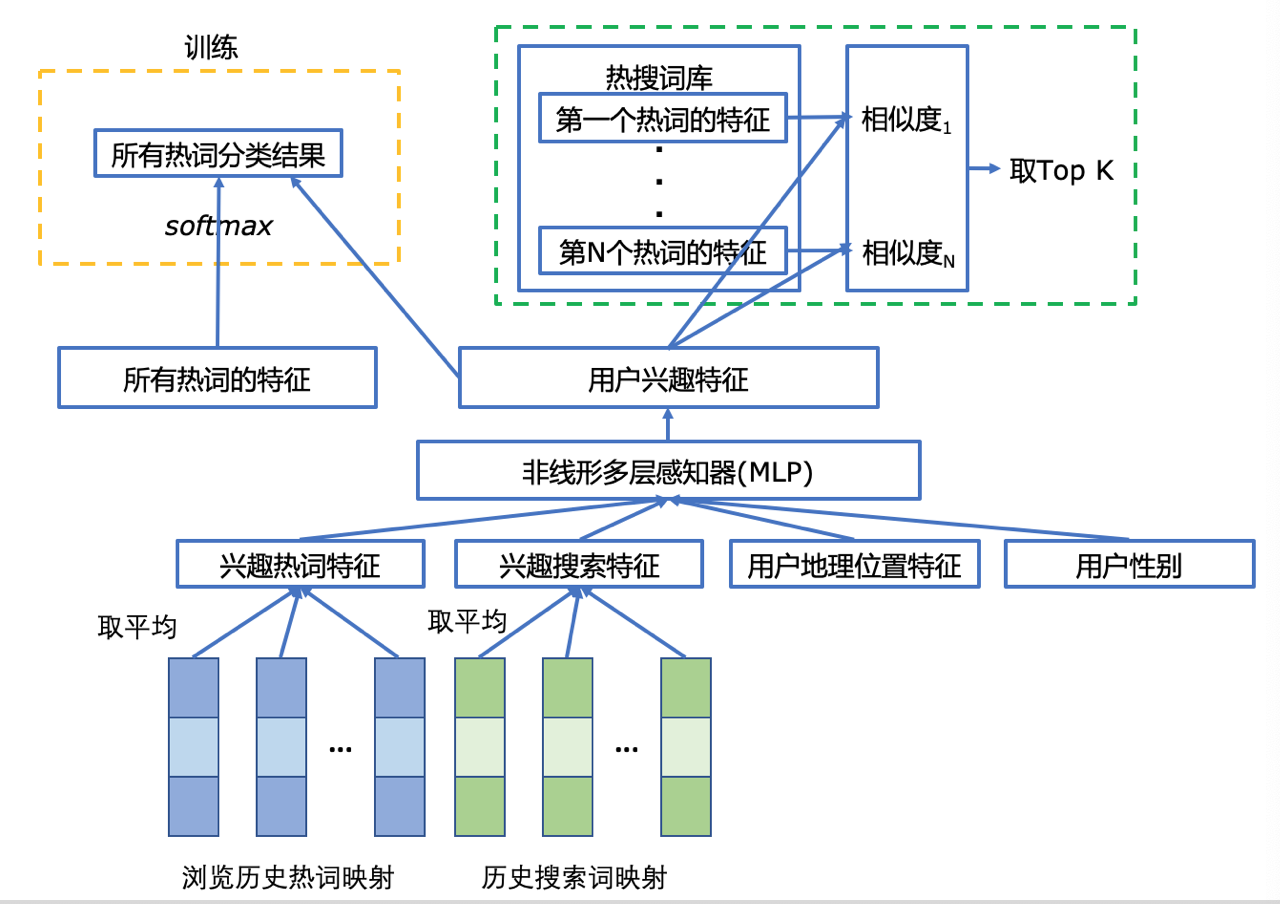

**Figure 2: Recommendation system architecture demonstrating the 
"tower" structure help us obtain the user preference**

In [2]:
import pandas as pd

In [22]:
import sqlite3

In [25]:
conn = sqlite3.connect('Querry_log.sqlite')
cur = conn.cursor()

In [36]:
cur.execute('''SELECT uid FROM Query WHERE date = ? AND time = ? ''',('2019-03-15','14:07:07'))
trail = cur.fetchall()

In [13]:
#conn = sqlite3.connect('Querry_log.sqlite')
#cur = conn.cursor()
#Do some setup

#behavior means whether the user searched something or simple click something.

cur.executescript('''
DROP TABLE IF EXISTS Query;
DROP TABLE IF EXISTS Recommender;
DROP TABLE IF EXISTS Hotphrase;

CREATE TABLE Query (
    date DATE NOT NULL,
    time TIME NOT NULL,
    phrase TEXT,
    uid INTEGER,
    behavior INTEGER
);

CREATE TABLE Recommender (
    date DATE NOT NULL,
    time TIME NOT NULL,
    uid INTEGER,
    recomend1 TEXT NOT NULL,
    recommend2 TEXT NOT NULL,
    recommend3 TEXT NOT NULL,
    recommend4 TEXT NOT NULL,
    recommend5 TEXT NOT NULL,
    recommend6 TEXT NOT NULL
);

CREATE TABLE Hotphrase(
    date DATE NOT NULL,
    time TIME NOT NULL,
    hotphrase1 TEXT NOT NULL,
    hotphrase2 TEXT NOT NULL,
    hotphrase3 TEXT NOT NULL,
    hotphrase4 TEXT NOT NULL,
    hotphrase5 TEXT NOT NULL,
    hotphrase6 TEXT NOT NULL,
    hotphrase7 TEXT NOT NULL,
    hotphrase8 TEXT NOT NULL,
    hotphrase9 TEXT NOT NULL,
    hotphrase10 TEXT NOT NULL,
    hotphrase11 TEXT NOT NULL,
    hotphrase12 TEXT NOT NULL,
    hotphrase13 TEXT NOT NULL,
    hotphrase14 TEXT NOT NULL,
    hotphrase15 TEXT NOT NULL,
    hotphrase16 TEXT NOT NULL,
    hotphrase17 TEXT NOT NULL,
    hotphrase18 TEXT NOT NULL,
    hotphrase19 TEXT NOT NULL,
    hotphrase20 TEXT NOT NULL,
    hotphrase21 TEXT NOT NULL,
    hotphrase22 TEXT NOT NULL,
    hotphrase23 TEXT NOT NULL,
    hotphrase24 TEXT NOT NULL,
    hotphrase25 TEXT NOT NULL,
    hotphrase26 TEXT NOT NULL,
    hotphrase27 TEXT NOT NULL,
    hotphrase28 TEXT NOT NULL,
    hotphrase29 TEXT NOT NULL,
    hotphrase30 TEXT NOT NULL,
    hotphrase31 TEXT NOT NULL,
    hotphrase32 TEXT NOT NULL,
    hotphrase33 TEXT NOT NULL,
    hotphrase34 TEXT NOT NULL,
    hotphrase35 TEXT NOT NULL,
    hotphrase36 TEXT NOT NULL,
    hotphrase37 TEXT NOT NULL,
    hotphrase38 TEXT NOT NULL,
    hotphrase39 TEXT NOT NULL,
    hotphrase40 TEXT NOT NULL,
    hotphrase41 TEXT NOT NULL,
    hotphrase42 TEXT NOT NULL,
    hotphrase43 TEXT NOT NULL,
    hotphrase44 TEXT NOT NULL,
    hotphrase45 TEXT NOT NULL,
    hotphrase46 TEXT NOT NULL,
    hotphrase47 TEXT NOT NULL,
    hotphrase48 TEXT NOT NULL,
    hotphrase49 TEXT NOT NULL,
    hotphrase50 TEXT NOT NULL,
    PRIMARY KEY (date, time)
)
''')

In [101]:
a = [1,2]
b = [3,4]
tuple(a + b)

(1, 2, 3, 4)

In [31]:
conn.commit()
cur.close()

In [29]:
cur.execute('''SELECT date,time, uid, phrase from Query WHERE uid = ?''',(5402646416,))

In [30]:
cur.fetchall()

[('2019-03-15', '14:07:01', 5402646416, '#郑俊英最高刑罚可判入狱7年半#'),
 ('2019-03-15', '14:07:17', 5402646416, '#赵品霖淘汰#')]

In [27]:
cur.execute('''SELECT uid FROM Query WHERE date = \'2019-03-19\';''')
#uid_list = [row for row in cur.fetchall()]
#print(uid_list)

In [28]:
uid_list = cur.fetchall()

In [32]:
output_list = [uid[0] for uid in uid_list]

In [39]:
a = tuple([10,10])
b = tuple([2.3])
c = tuple(list(a) +list(b))
c[:2]

(10, 10)

In [15]:
cur.excecute('''SELECT phrase from query''')

537615

In [23]:
uid_normal = [uid for uid in uid_list if len(str(uid[0])) == 10]

In [47]:
from tqdm import tqdm

In [17]:
set_uid = list(set(uid_list))

In [18]:
set_uid[0]

(5124239253,)

In [98]:
with open('.\Deep_Learning\\recommender_log.201903191130.txt', 'r', encoding='UTF-8') as f:
    lines = f.readlines()
    fields = lines[353].strip().split("\t")
    print(fields)
    print(len(fields))

['2019-03-19 11:30:01', '6570405133', 'disp', '谢霆锋否认与杨幂恋情', '陆定昊被暂停组合内所有工作', '2018年结婚率创新低', '用一句话得罪全班人', '比悲伤更悲伤的故事 泪点', '用同一根吸管的关系', '美团饿了么否认偷听', '李一凡', '美国前儿科医生获刑158年']
12


In [99]:
with open('.\Deep_Learning\\merge.20190319-1130.txt', 'r', encoding='UTF-8') as f:
    lines = f.readlines()
    print(len(lines))
    for line in lines:
        fields = line.strip().split("\t")
        print(fields)

156
['谢霆锋否认与杨幂恋情', '谢霆锋否认与杨幂恋情', '4351503379148278', '16', '2345672', '5', '1', '2019-03-19 08:49', 'A', '2345672', '4']
['陆定昊被暂停组合内所有工作', '陆定昊被暂停组合内所有工作', '4351505777494985', '1', '1714142', '0', '1', '2019-03-19 10:49', 'A', '1714142', '4']
['2018年结婚率创新低', '2018年结婚率创新低', '4351504490530660', '16', '1327719', '5', '1', '2019-03-19 09:59', 'A', '1327719', '4194304']
['用一句话得罪全班人', '用一句话得罪全班人', '4351267595365658', '1', '1034043', '5', '1', '2019-03-19 09:46', 'B', '1034043', '8192']
['比悲伤更悲伤的故事 泪点', '比悲伤更悲伤的故事 泪点', '4351505945779619', '16', '824950', '4', '1', '2019-03-19 07:45', 'A', '824950', '524288']
['用同一根吸管的关系', '用同一根吸管的关系', '4351476308744486', '1', '727219', '5', '1', '2019-03-19 10:31', 'B', '727219', '4096']
['美团饿了么否认偷听', '美团饿了么否认偷听', '4351514002407564', '16', '606566', '8', '1', '2019-03-19 07:20', 'A', '606566', '528']
['李一凡', '李一凡', '4351503365874896', '16', '528480', '4', '1', '2019-03-19 07:40', 'A', '391191', '16']
['美国前儿科医生获刑158年', '美国前儿科医生获刑158年', '4351504431053181', '1',

['云次方', '云次方', '4351501763137029', '0', '10880', '4', '0', '2019-03-19 07:11', 'C', '10880', '4']
['独孤皇后结局', '独孤皇后结局', '4351503319595141', '0', '10651', '4', '0', '2019-03-18 21:00', 'C', '10651', '524288']
['校方回应要求女生发不搭肩', '校方回应要求女生发不搭肩', '4351311648309181', '0', '10408', '5', '1', '2019-03-18 22:31', 'A', '10408', '4194304']
['张敬轩', '张敬轩', '4351310126441256', '0', '10338', '4', '0', '2019-03-18 22:10', 'C', '10338', '4']
['焦越', '焦越', '4351506843368235', '0', '9280', '4', '0', '2019-03-18 17:26', 'A', '9280', '16']
['崔钟勋承认与总警有交情', '崔钟勋承认与总警有交情', '4351294736831524', '0', '8323', '1', '1', '2019-03-18 21:25', 'A', '8323', '4']
['陈果 新闻联播', '陈果 新闻联播', '4351273220612997', '0', '8150', '4', '0', '2019-03-18 19:32', 'C', '8150', '131072']
['文在寅 卢武铉', '文在寅 卢武铉', '4350843627109887', '0', '8004', '4', '0', '2019-03-18 17:05', 'A', '8004', '131072']
['知道嗯哼长大以后什么样了', '知道嗯哼长大以后什么样了', '4351169406748570', '0', '7709', '1', '1', '2019-03-18 14:05', 'A', '7709', '4']
['王怡人终于出道了', '王怡人终于出道了', '43512578

['东北人都没有社恐吧', '东北人都没有社恐吧', '4351167037562919', '0', '4934', '5', '1', '2019-03-18 11:57', 'B', '4934', '8192']
['物流造假', '物流造假', '4351504670197540', '0', '4932', '5', '1', '2019-03-18 11:23', 'C', '4932', '16']
['朴有天被起诉赔偿1亿', '朴有天被起诉赔偿1亿', '4351196943348390', '0', '4896', '5', '1', '2019-03-18 14:11', 'A', '4896', '4']
['崔珉豪申请海军陆战队服役', '崔珉豪申请海军陆战队服役', '4351238818491226', '0', '4894', '1', '1', '2019-03-18 18:21', 'A', '4894', '4']
['报销奴', '报销奴', '4351168132137794', '0', '4892', '5', '1', '2019-03-18 16:19', 'B', '4892', '8192']
['男生对口红色号的认知', '男生对口红色号的认知', '4351149236648257', '0', '4888', '8', '1', '2019-03-18 13:19', 'B', '4888', '2105344']
['张紫妍案或将延长调查', '张紫妍案或将延长调查', '4351246997945550', '0', '4871', '5', '0', '2019-03-18 19:25', 'A', '4871', '4']
['埃航空难死者以焦土代替遗体', '埃航空难死者以焦土代替遗体', '4351191355313124', '0', '4825', '8', '1', '2019-03-18 12:54', 'A', '4825', '4194304']
['公开查询科创板企业申报信息', '公开查询科创板企业申报信息', '4351259840808924', '1', '4816', '5', '0', '2019-03-18 11:57', 'C', '4816', '32']
['

In [1]:
with open('.\Deep_Learning\querylog_201903151408.txt', 'r', encoding='UTF-8') as f:
    lines = f.readlines()
    print(len(lines))
    for line in lines:
        fields = line.strip().split("\t")
        #print(fields)
    print(fields)

354707
['2019-03-15 14:09:01', '辅食土豆饼', '1806098694', '0', 't_wap_ios', '&cip=223.104.217.91&lon=106.108049&lat=30.786518&uicode=10000003&luicode=10000327', '1552630141317.5&10.85.189.215']


In [3]:
import re

In [5]:
?re.findall

In [16]:
strx = re.findall('t(.*)-','.\Deep_Learning\hot20190319-1130.txt')[0]
strx[6:]

'19'

In [12]:
re.findall('-(.*).txt','.\Deep_Learning\hot20190319-1130.txt')

['1130']

In [19]:
from tqdm import tqdm

In [24]:
query_log = [".\Deep_Learning\querylog_201903191130.txt",".\Deep_Learning\querylog_201903191131.txt"]
for log in query_log:
    with open(log,'r', encoding='UTF-8') as fd:
        
        lines = fd.readlines()
        print ('Total line numbers are: %s' %(len(lines)))
        cur_ = 1
        total_ = len(lines)
        
        for line in tqdm(lines):
            
            fields = line.strip().split("\t")
            #print(len(fields))
            if len(fields)!= 7:
                cur_ += 1
                continue
                
            d_t = fields[0].split(" ")
            if len(d_t) == 0:
                cur_ += 1
                continue
            
            try:
                phrase = fields[1]
                uid = int(fields[2])
                if uid == 0:
                    cur_ += 1
                    continue
            except:
                print(fields)
                cur_ += 1
                continue
            
            try:
                behavior_code = fields[3]

            except:
                print("\n",fields)
                cur_ += 1
                continue
            
            
            if behavior_code == '1' or behavior_code == '2' or behavior_code == '3':
                behavior = 0
            elif behavior_code == '30':
                behavior = 1
            elif behavior_code == '31':
                behavior = 2
            else:
                cur_ += 1
                continue
            #print(d_t[0] , d_t[1], phrase, uid, behavior)
            try:
                cur.execute('''INSERT OR IGNORE INTO Query (date, time, phrase, uid, behavior) VALUES ( ?, ?, ?, ?, ? )''', ( d_t[0] , d_t[1], phrase, uid, behavior) )
        
            except:
                cur_ += 1
                continue
                
            if cur_ % 10000 == 0:
                conn.commit()
            
            #if cur_ % 10000 == 0 or cur_ == total_:
            #    progress_bar(cur_, total_)
            
            cur_ += 1
            
            
conn.commit()
cur.close()

Total line numbers are: 363117


100%|█████████████████████████████████████████████████████████████████████████████████| 363117/363117 [00:08<00:00, 44709.80it/s]


Total line numbers are: 352877


100%|█████████████████████████████████████████████████████████████████████████████████| 352877/352877 [00:06<00:00, 52013.82it/s]


### 4.1 Phrase Embedding
* To effectively represent all the natural language text, including the search and pick history and feature of hot phrases, we consider to embed the phrase to dipict its latent features. Also, Inspired by the contineous bag of words model, we than would be able to first tokenize each query into unigrams and bigrams and each token is embedded, here we adopt an open sourece embedding matrix.

For each sentence $s_i$, we would tokenize it and obtain $list_{i}$

$$List_i = ['word1','word2',\cdots,'wordn']$$

Then we simply remove stop words in the list.

Now we do the embedding:

$$\vec{Woh_k} = dict['wordk']$$

where $k\in\{1,2,\cdots,n\}$

$dict$ is the hash table that stores the one-hot encoding representation of all words

$$\vec{e_k} = E*\vec{Woh_k}$$

where

$E$ is the open source word embedding matrix

$\vec{Woh_k}$ is the one hot representation of certain unigram or bigram in the dictory

$\vec{e_k}$ is the embedding vector. However, in the real training, we tend to simply pick the index and pick out the corresponding embedding vector.

After all these, we then average all the vectors to obtain the embedding of the phrase:

$$\vec{e_i} = \frac{1}{m}*\Sigma^n_{k=1}\vec{e_k}$$

* Then after elimiting stopwords, we simply calculate the avereage embedding vector of the bage of words.

In [91]:
import os
import sys
import json
import time
import logging
import jieba
import jieba.analyse
import jieba.posseg as pseg
import operator
from gensim.models import word2vec
from gensim.models import KeyedVectors

In [92]:
class Word2Vec:
    """
    The Word2Vec class, building a word to vec instance. the path of the w2v .bin file is needed when initialize.
    """
    def __init__(self, format_file_path):
        self.model = self.load_model(format_file_path)

    def load_model(self, path):
        try:
            model = KeyedVectors.load_word2vec_format(path, binary=False)
        except Exception as e:
            pass
        return model

    def gen_word_vec(self,word):
        try:
            if word in self.model:
                vector = self.model[word]
            else:
                vector = np.zeros(100)
            str_vector = ' '.join(str(det) for det in list(vector))
        except Exception as e:
            pass
        return str_vector

In [93]:
def embedding_config(word_to_vec_path, stop_word_path, dict_path_list):
    """
    Set all the configuration for jieba and gensim.
    
    Arguments:
    word_to_vec_path -- the path of the word_to_vec bin file, dtype: string
    stop_word_path -- the path of the stop word dictionary, dtype: string
    dict_path_list -- the list of all the path of the dictionarys needed, dtype: string
    
    Returns:
    Succeed -- whether you have successfully set the jieba
    v2w -- the instance of word_2_vec
    """
    
    # Load in all the dictionary
    try:
        for path in dict_path_list:
            jieba.load_userdict(path)
            print('{} has been successfully loaded!'.format(path))
        jieba.initialize()
        flag1 = True
    except:
        print('Check your dictionary path: {}!'.format(path))
    
    
    # Set the stop words
    try:
        jieba.analyse.set_stop_words(stop_word_path)
        print("Successfully set the stopwords list!")
        flag2 = True
    except:
        print("Check your stopwords path!")
        
    
    # Set the word to vec instance'
    try:
        w2v = Word2Vec(word_to_vec_path)
        print("Successfully initialize the word2vec instance!")
        flag3 = True
    except:
        print("Check your word2vec path!")
    
    Flag = flag1 and flag2 and flag3
    return w2v, Flag

In [110]:
def phrase_embedding(S, w2v, top_k_importance = 5 ,star_pool = None, event_pool = None):
    """
    Embedding a phrase or word into a lower dimension space. The output represents the representation of the feature of the whole 
    sentence instead of a single word.
    
    Arguments:
    S -- the whole pharse, dtype: string
    w2v -- object mapping words to their BERT vector representation, dtype: object
    top_k_importance -- the top k words analyzed by jieba after removing stopwords and applying tf-idf filter
    star_pool -- star name set that used to tract stars from the tags, dtype: list( Preparing )
    event_pool -- event that used to tract events from the tags, dtype: list( Preparing )
    
    Returns:
    embedding_vec -- phrase embedding vector, of shape(ndim, )
    """
    
    word_tags = jieba.analyse.extract_tags(S, top_k_importance)           # substract the critical tags that we need
    # We presume that the start names is the priority users care, thus we retrive all the star names from the word bag
#    if len(list(set(word) & set(star_pool))):
#        effectove_word_tags = list(set(word_tags) & set(star_pool))
#    
#    # If that strategy doesn't work, then we substract the event words
#    else:
#        word_tags = jieba.analyse.extract_tags(S, 20)
#        effective_word_tags = list(set(word_tags) & set(event_pool))

    effective_word_tags = word_tags
    
    # Use the word we have retrived, we need to transform them into vectors
    vec_stack = []
    for word in effective_word_tags:
        str_vector = w2v.gen_word_vec(word)
        str_vec = np.array([float(i) for i in str_vector.split(" ")]).reshape(-1,1)
        vec_stack.append(str_vec)
    
    # We here simple average all these vectors, we may choose to adopt a strategy to adapt this later 
    ave_vec = np.zeros(str_vec.shape)
    for vec in vec_stack:
        ave_vec += vec
    ave_vec = ave_vec/len(vec_stack)        

    return ave_vec

In [39]:
tuple(['kiss', np.array([[1,2,3]])])

('kiss', array([[1, 2, 3]]))

In [112]:
#Test code
dict_path_list = [".\Deep_Learning\extend_dict.txt",\
                  ".\Deep_Learning\person_dict.txt",\
                  ".\Deep_Learning\THU_dict.txt",\
                  ".\Deep_Learning\ctv_dict.txt"]
word_to_vec_path = ".\Deep_Learning\ctopicWordVector.bin"
stop_word_path = ".\Deep_Learning\stopwords.txt"

S = '在杜兰特缺席的情况下，勇士以106：104击败火箭，以一场重要的胜利为斯蒂芬·库里庆生。转眼间，人们口中这个外表与性格都极其童真的小个子也已经31岁了，已经是收获了两个mvp与三个总冠军的超级巨星。未来请继续自在如意、健健康康的打球就好了。'

w2v, flag = embedding_config(word_to_vec_path, stop_word_path, dict_path_list)
test_vec = phrase_embedding(S, w2v, 20)

print(test_vec.T)

[[-0.00365019 -0.05339141  0.02966968  0.05818665  0.07287169 -0.00209924
   0.06490751 -0.00588589  0.03933113 -0.01314359 -0.02325189  0.07138862
  -0.02147904  0.03266319  0.03519889 -0.04527342  0.00175805 -0.05853824
  -0.03759255  0.06116734 -0.03531131 -0.02855241  0.05115001 -0.02869079
  -0.02250712 -0.05631357  0.00997675 -0.10881615  0.02695699  0.01776032
   0.0258962   0.07834638 -0.03143493  0.0952265  -0.01620944 -0.01335063
  -0.05314377 -0.0479223   0.09141566 -0.03714541  0.0046665   0.0702781
   0.06682523  0.02032903 -0.02575438  0.00020173  0.03061629  0.01291594
   0.00145232 -0.00294865 -0.03581554 -0.02770419 -0.00410288 -0.0010389
  -0.03484673 -0.0513204   0.08035699  0.01041432 -0.02583586 -0.07129259
   0.05623106  0.02708036  0.05077975 -0.02628505  0.02146396 -0.00593837
   0.00373979 -0.04839644 -0.03738508 -0.02002781  0.01175662 -0.02984228
  -0.06043985 -0.03259121  0.03273011 -0.02069407  0.0822567   0.05886934
  -0.06520068 -0.06643937 -0.04092565  0

### 4.2 Recommender as Similarity Calculation
* Traditionally, we would consider the recommeder as a box which select a few words from a large corpus, but here our tesk is to pick out the most effective hot phrases from a small pool (within 50 words) to certain user, then we may consider to find the similarity between a preference vector $\vec{p_u}$, which represents the users' preference and the embedding vector $\vec{e_i}$
$$sim(\vec{p_u},\vec{e_i}) = \frac{\vec{p_u}\cdot\vec{e_i}}{|\vec{p_u}||\vec{e_i}|}$$

* At serving time we need to compute the most likely N classes (hot phrases) in order to choose the top N to present to the user. We will store the embedding vector of hot phrases and user preference in hash table. Then this becomes an nearest neighbour search.

In [115]:
def sim_tf(usr_prfr,embd):
    """
    Calculate the similarity of user preference embedding and embeding matrix
    
    Arguments:
    usr_prfr -- user preference embedding vector, of shape(None, e_dim).
    embd -- phrase embedding vector, of shape(None, e_dim)
    
    Returns:
    sim -- real number, value of the similarity, of shape(None, 1)
    """
    
    #norm
    usr_norm = tf.sqrt(tf.reduce_sum(tf.square(usr_prfr), axis=-1))
    ebd_norm = tf.sqrt(tf.reduce_sum(tf.square(embd), axis=-1))
    
    #inner_product
    inner_product = tf.reduce_sum(tf.multiply(usr_prfr, embd), axis = -1)
    
    #similarity
    sim = tf.reshape(tf.divide(inner_product, tf.multiply(usr_norm, ebd_norm)), [-1,1])
    
    return sim

In [144]:
#Test case
with tf.Session() as sess:
    v12 = tf.constant([[1,2],[5,6]],dtype=tf.float32)
    v22 = tf.constant([[1,2],[-5,-6]],dtype=tf.float32)
    v4 = sim_tf(v12,v22)
    print(sess.run(v4))

[[ 1.        ]
 [-0.99999994]]


expected output: [[0.9979289 ]
 [0.99981695]]

In [133]:
def sim_py(usr_prfr,embd):
    """
    Calculate the similarity of user preference embedding and embeding matrix
    
    Arguments:
    usr_prfr -- user preference embedding vector, of shape(1, e_dim).
    embd -- phrase embedding vector, of shape(m, e_dim)
    
    Returns:
    sim -- real number, value of the similarity, of shape(m, 1)
    """
    
    #norm
    usr_norm = np.linalg.norm(usr_prfr)
    #print(usr_norm)
    ebd_norm = np.linalg.norm(embd, axis = 1).reshape(-1,1)
    #print(ebd_norm)
    
    #inner_product
    inner_product = np.dot(embd,usr_prfr.T)
    #print(inner_product)
    
    #similarity
    sim = inner_product/(usr_norm*ebd_norm)
    
    return sim

In [134]:
#Test code
a = np.array([[1,2]])
b = np.array([[1,2],[3,4]])
sim_py(a,b)

array([[1.        ],
       [0.98386991]])

expected output: array([[1.        ],
       [0.98386991]])

### 4.3 Efficient Negative Sample
* To effectively train the model with millions of negative samples with only few positive samples ("imbalance problem"), we deciside to use the negative sample on the cover page (top 5 to 6 words ranking high in the recommended box) as our neigative example:

$$
\left[
\begin{matrix}
  Preference:(P_u) & Embedding:e_{ij} & Label(y_{ij}) \\
  \vec{p_u} & \vec{e_{i1}} & 1 \\
  \vec{p_u} & \vec{e_{i2}} & -1 \\
  \vec{p_u} & \vec{e_{i3}} & -1 \\
  \vec{p_u} & \vec{e_{i4}} & -1 \\
  \vec{p_u} & \vec{e_{i5}} & -1 \\
  \vec{p_u} & \vec{e_{i6}} & -1 
\end{matrix}
\right]
$$

where

$\vec{e_{i1}}$is the embedding of the hot phrase picked by the user at a period.

$\vec{e_{ij}},\quad j\in\{2,3,4,5,6\}$ are the embeddings of the hot phrase that wasn't picked by the user but ranked top 2 to 6 in the box. if any one of them has been picked by the user, then we simply chose the top 5 phrases from the leftover phrase pool.

Then based on these data we try to form the preference, positive & negative pairs, which is defined as:

$$(P,N,F)_{ij} = (\vec{p_u},\vec{e_{i1}},\vec{e_{ij}})$$

* We then consider each pair as one of the trining sample to culculate the triple loss. Without loss of generality, we here simple collect all these triple pairs and denote them as $(P,N,F)_i$, $i\in\{1,2,\cdots,m\}$, thus we obtained m examples.

In [98]:
def effective_examples(usr_prfr, embd_list):
    """
    Calculate the triple pairs of user preference positive and negative samples
    
    Arguments:
    usr_prfr -- user preference embedding vector, of shape(ndim, 1).
    embd_list -- list of phrase, in total there are 6 embeddings:
                embd_list[0] is the positive click embedding, of shape(ndim, 1)
                embd_list[2:5] is the list of negative click embedding, of shape(ndim, 1)
    
    Returns:
    triple_list -- list of triple pairs, lenth of each list is 5
    """
    #Create a empty stack to store the triple pairs
    triple_list = []
    
    P = usr_prfr
    N = embd_list[0]
    for i in range(1,6):
        #print(i)
        F = embd_list[i]
        triple = (P, N, F)
        triple_list.append(triple)
    
    return triple_list

In [113]:
with tf.Session() as sess:
    u = np.array([1,2,3], dtype = float)
    a = np.array([4,5,6], dtype = float)
    b = np.array([7,8,9], dtype = float)
    c = np.array([10,11,12], dtype = float)
    d = np.array([13,14,15], dtype = float)
    e = np.array([16,17,18], dtype = float)
    f = np.array([19,20,21], dtype = float)
    
    embedding_test = [a,b,c,d,e,f]
    
    print(effective_examples(u, embedding_test))

[(array([1., 2., 3.]), array([4., 5., 6.]), array([7., 8., 9.])), (array([1., 2., 3.]), array([4., 5., 6.]), array([10., 11., 12.])), (array([1., 2., 3.]), array([4., 5., 6.]), array([13., 14., 15.])), (array([1., 2., 3.]), array([4., 5., 6.]), array([16., 17., 18.])), (array([1., 2., 3.]), array([4., 5., 6.]), array([19., 20., 21.]))]


expected output: 

[(array([1., 2., 3.]), array([4., 5., 6.]), array([7., 8., 9.])),

(array([1., 2., 3.]), array([4., 5., 6.]), array([10., 11., 12.])), 

(array([1., 2., 3.]), array([4., 5., 6.]), array([13., 14., 15.])),

(array([1., 2., 3.]), array([4., 5., 6.]), array([16., 17., 18.])),

(array([1., 2., 3.]), array([4., 5., 6.]), array([19., 20., 21.]))]

### 4.4 Model Architectures
* A user's search history is represented by a variable-length sequence of embedding vectors which is mapped to a dense vector representation via a function. **We here simply averaging these embeddings.**

In [109]:
def average_history(history_list):
    """
    Calculate the average embedding of user query history
    
    Arguments:
    history_list -- the list of user query history containing 1d numpy array with variable length.
    
    Returns:
    average_embedding -- the average history embedding of the user,
    """
    average_query = np.zeros(history_list[0].shape)
    for query in history_list:
        average_query += query
    
    average_query /= len(history_list)
    return average_query

In [110]:
#Test code
history_list = [np.array([1,2,3]), np.array([4,5,6]), np.array([7,8,9])]
general_history = average_history(history_list)
general_history

array([4., 5., 6.])

expected output: array([4., 5., 6.])

* Features are **concatenated into a wide first layer** $\vec{U_u} = [\vec{e_{query}}, \vec{e_{basic\ info}}, \vec{e_{activity\  measurement}}]$, followed by several layers of fully connected Rectified Linear Units (ReLU).

In [122]:
def concatenate_user(average_query,basic_info,activity_measurement):
    """
    Concatenate the query history vector, user basic information vactor and avtivity measurement vector/scaler
    
    Arguments:
    average_query -- the average query history of 1 sample, 1d numpy array of shape (ndim,)
    basic_info -- the basic infor mation of 1 sample, 1d numpy array of shape (3+n_interest,)
    activity_measurement -- the measurement of user activity, 1d array of shape (1,)
    
    Returns:
    user_vector -- the total info of a user, 2d array of shape (1, ndim+3+n_interest+1)
    """
    
    user_vector = np.concatenate((average_query, basic_info, activity_measurement), axis = 0).reshape(1,-1)
    return user_vector

In [123]:
#Test code
v1 = np.array([1,2,3])
v2 = np.array([4,5,6,7,8,9,0])
v3 = np.array([1])

v4 = concatenate_user(v1,v2,v3)
v4

array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1]])

expected output: array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1]])

* **Each layer would halve the dimension of the previous layer.** e.g. input(full lenth)→first hidden layer(1/2 lenth)→second hidden layer(1/4 lenth)...→$\vec{P_u}$
* Importantly, **the embeddings are fixed** (Since our embedding meatrix is given) while all other model parameters will be learned through normal gradient descent backpropagation updates.

In [292]:
# Core function: model architecture
def model(query, user_info, activity, near, far):
    sess = tf.InteractiveSession()
    
    query_shape = query.shape[1]
    user_info_shape = user_info.shape[1]
    activity_shape = activity.shape[1]
    
    # Inputs
    X1 = tf.placeholder(shape = (None, query_shape), dtype = tf.float32)
    X2 = tf.placeholder(shape = (None, user_info_shape), dtype = tf.float32)
    X3 = tf.placeholder(shape = (None, activity_shape), dtype = tf.float32)
    
    X = tf.concat(1, [X1,X2,X3], name = "concate")
       
    Y1 = tf.placeholder(shape = (None, query_shape), dtype = tf.float32)
    Y2 = tf.placeholder(shape = (None, query_shape), dytpe = tf.float32)
    
    sample_num,_ = Y1.get_shape().as_list()
    
    
    #Model parameters
    batch_size = 64
    inshape1 = query_shape+user_info_shap+activity_shape
    outshape1 = 2048
    inshape2 = outshape1
    outshape2 = 1024
    inshape3 = outshape2
    outshape3 = int(inshape3*3/4)
    inshape4 = outshape3
    outshape4 = inshape4
    
    
    #hps
    W1 = tf.get_variable("W1", shape = (inshape1, outshape1))
    b1 = tf.get_variable("b1", shape = (outshape1))
    W2 = tf.get_variable("W2", shape = (inshape2, outshape2))
    b2 = tf.get_variable("b2", shape = (outshape2))
    W3 = tf.get_variable("W3", shape = (inshape3, outshape3))
    b3 = tf.get_variable("b3", shape = (outshape3))
    W4 = tf.get_variable("W3", shape = (inshape4, outshape4))
    b4 = tf.get_variable("b3", shape = (outshape4))
    W_out = tf.get_variable("W_out", shape = (outshape4, query_shape))
    b_out = tf.get_variable("b_out", shape = (query_shape))
    
    
    # Construct the model.
    hidden_layer = X
    for W, b in [(W1, b1), (W2, b2), (W3, b3), (W4, b4)]:
        hidden_layer = tf.matmul(hidden_layer, W) + b
        hidden_layer = tf.nn.relu(hidden_layer)
    prediction = tf.matmul(hidden_layer, W_out) + b_out
    loss = triplet_loss(prediction, Y1, Y2, epsilon = 0.2)#hp1
    optimizer = tf.train.AdamOptimizer(0.001)#hp2
    train_step = optimizer.minimize(cross_entropy)
    
    #Metrics
    ones = tf.ones([shape_num, 1])
    zeros = tf.zeros([shape_num, 1])
    judge = sim_tf(prediction,Y1)<sim_tf(prediction,Y2)
    match = tf.where(judge, x=ones, y=zeros, name=None)

In [293]:
#Test page
with tf.Session() as sess:
    pred = tf.constant([[1,2,3],[4,5,6],[5,5,4]], dtype = tf.float32)
    val1 = tf.constant([[1,2,3],[10,11,12],[5,5,4]], dtype = tf.float32)
    val2 = tf.constant([[0,0,0],[4,5,6],[5,5,4]], dtype = tf.float32)
    s1 = sim_tf(pred,val1)
    s2 = sim_tf(pred,val2)
    judge = s1<s2
    y = tf.zeros(s1.get_shape())
    x = tf.ones(s1.get_shape())
    true = tf.where(judge,
    x=x,
    y=y,
    name=None
    )
    print(sess.run(s1))
    print(sess.run(s2))
    print(sess.run(true))

[[0.99999994]
 [0.99614984]
 [0.9999999 ]]
[[      nan]
 [1.       ]
 [0.9999999]]
[[0.]
 [1.]
 [0.]]


### 4.5 Loss
Since we pick the words based on the similarity, we need to define triple loss as the similarity of positive example minus the negative examples plus epsilon, a small float in order to distinguish the positive example from the negative one as far as possivle. This is just like what we have done in face recongnition, where we wang the classifier to distinguish the positive and the negative as far as possib le. We define the triple loss :

$$Loss = \Sigma^m_{i=1}max( D_i - C_i + \epsilon, 0 )$$

where

$$C_i =  sim(P_i,N_i)$$

$$D_i =  sim(P_i,F_i)$$

and $\epsilon$ is a hyperparameter that is used inorder to distinguish the positive sample from the negative ones.


In [147]:
# Helper Function: triplet_loss

def triplet_loss(y_pred, y_near, y_far, epsilon = 0.2):
    """
    Implementation of the triplet loss as defined by formula (3)
    
    Arguments:
    y_pred -- true labels, required when you define a loss in Keras, you don't need it in this function.
            positive -- the embeddings for the positive phrase, of shape (None, e_dim)
            negative -- the embeddings for the negative phrase, of shape (None, e_dim)
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor phrase, of shape (None, e_dim)
            
    
    Returns:
    loss -- real number, value of the loss
    """
    
    anchor = y_pred
    positive = y_near
    negative = y_far
    
    # Step 1: Compute the (encoding) distance between the anchor and the positive, you will need to sum over axis=-1
    pos_sim = sim_tf(anchor,positive)
    # Step 2: Compute the (encoding) distance between the anchor and the negative, you will need to sum over axis=-1
    neg_sim = sim_tf(anchor,negative)
    # Step 3: subtract the two previous distances and add alpha.
    basic_loss = tf.add(tf.subtract(neg_sim,pos_sim),epsilon)
    # Step 4: Take the maximum of basic_loss and 0.0. Sum over the training examples.
    loss = tf.reduce_sum(tf.maximum(basic_loss,0))
    
    return loss

In [148]:
#Test code
with tf.Session() as sess:
    v_p = tf.constant([[1,1],[0,1],[1,0]], dtype = tf.float32)
    v_n = tf.constant([[1,1],[0,1],[1,0]], dtype = tf.float32)
    v_f = tf.constant([[-1,-1],[0,-1],[-1,0]], dtype = tf.float32)
    loss = triplet_loss(v_p, v_n, v_f, epsilon = 0)
    print(sess.run(loss))

0.0


expected output: 0.0

#### 4.6 Metrics Methodology
Since we don't have real examples, we tend to measure the offline performance of our new recommender algorithm by NDCG measurement:

$$CG_k = \Sigma^{p}_{i = 1}rel_i$$

$$DCG_k = \Sigma^{p}_{i = 1}\frac{rel_i}{log_2(i+1)} = rel_1 + \Sigma^{p}_{i = 2}\frac{rel_i}{log_2(i+1)}$$

Where $i$ is the rank of the hot phrase, $k$ is the $k$ th phrase group in the dev or test set, $p$ is the number of recommended phrases we have

Here since we only know whether the user click or not, we form our own relavent measure as:

$$click\ efficiency_i =
\begin{cases}
0& \text{not click}\\
click\ num_k - click\ odr_i + 1& \text{click}
\end{cases}$$

where $click\ num_k$ is the total number of click in one phrase group, $click\ odr_i$ is the order of click in the phrase group.

$$rel_i = 2^{click\ efficiency_i} - 1$$

$$NDCG_k = \frac{DCG_k}{IDCG_k} $$

Then if we sort the relavent value in an descend order, we could obtain the ideal DCG score:

$$IDCG_k = \Sigma^{p}_{j = 1}\frac{rel_j}{log_2(j+1)}$$

where $rel_1$ is the largest among the rest ${rel_i}$, and $log_2(1+1)$ is the smallest among the rest ${log_2(j+1)}$

Finally we sum all the NDCG score and find its average value:

$$NDCG = \frac{\Sigma^{m}_{k = 1}NDCG_k}{m}$$

In [232]:
import math

In [180]:
#Qsort for float number
def partition(list1,list2, beg, end):
    pivot = list1[end-1]
    i = beg - 1
    for j in range(beg, end-1):
        if list1[j] <= pivot:
            i = i + 1                                 #no ++ or -- operator in python
            list1[i], list1[j] = list1[j], list1[i]       #swap lsit[i],list[j]
            list2[i], list2[j] = list2[j], list2[i]
    list1[i+1], list1[end-1] = list1[end-1], list1[i+1]   #swap list[i+1],list[end-1]
    list2[i+1], list2[end-1] = list2[end-1], list2[i+1]
    return i + 1
 
def sort(listx, listy, beg, end):
    if beg < end - 1:
        q = partition(listx, listy, beg, end)
        sort(listx, listy, beg, q)
        sort(listx, listy, q+1, end)

In [229]:
def NDCG_i(candidate_list, selected, preference):
    
    """
    Calculate the ndcg performance on the div/test set.
    
    Arguments:
    candidate_list -- the hot phrase pool, a list contains 50 hot phrases.
    selected -- the list of words that has been picked out, variable lenth list of strings
    preference -- the preference vector that is generated by the network, 1d array of shape(e_dim,)
    
    Returns:
    ndcg_i -- the ndcg score of ith sample, sacler
    
    """
    
    top_k = 5 # hypter parameter that we could change
    
    embedding_list = []
    
    for phrase in candidate_list:
        oned_arr = phrase_embedding(phrase,w2v,top_k).reshape(-1,)
        embedding_list.append(oned_arr) #Here the phrase embedding is a list of 1d array.
        
    embedding_arr = np.array(embedding_list)
    sim_arr = sim_py(preference.reshape(1,-1),embedding_arr)
    #Here I created the inverse sim arr, inorder to obtain the index for reverse sort
    inverse_sim_arr = 1/sim_arr
    #Then we obtain the phrase that has been sorted
    
    list_inv_sim = list(inverse_sim_arr.reshape(-1,))
    sort(list_inv_sim, candidate_list, 0, len(list_inv_sim))
    phrase_sorted = candidate_list
    #Here we obtain the phrase list in the new state
    
    
    print(phrase_sorted)
    print(selected)
    #Check our rank and the user preference
    
    click = []
    for i in selected:
        click.append(phrase_sorted.index(i))
    #Then we obtained all the index of user clicks
    
    rel = []
    click_efficiency = len(click)
    for i in range(len(candidate_list)):
        if i in set(click):
            rel.append(2**click_efficiency-1)
            click_efficiency -= 1
        else:
            rel.append(0)
    #This is the relation of the user clicks
    
    DCG = 0
    for i in range(len(candidate_list)):
        #print(math.log(i+1+1,2))
        DCG += rel[i]/math.log(i+1+1,2)
    #Then we have the value of DCG
    
    IDCG = 0
    for j in range(len(candidate_list)):
        if j <= len(click)-1:
            IDCG += (2**(j+1)-1)/math.log(j+1+1,2)
        else:
            IDCG += 0

    NDCG = DCG / IDCG
    print('NDCG = {}'.format(NDCG))
    
    return NDCG

In [230]:
#Test code
test_candidate = ['刚刚，@安以轩 在微博宣布怀孕喜讯','#外婆家洗菜池里洗拖把#','#建议彩礼纳入婚姻法#']
selected = ['#外婆家洗菜池里洗拖把#']
preference = phrase_embedding('安以轩',w2v,top_k_importance = 5)

ndcg = NDCG_i(test_candidate, selected, preference)

['刚刚，@安以轩 在微博宣布怀孕喜讯', '#建议彩礼纳入婚姻法#', '#外婆家洗菜池里洗拖把#']
['#外婆家洗菜池里洗拖把#']
NDCG = 0.5


In [231]:
def NDCG_all(info_tuple_list):
    """
    Here we want to calculate the total NDCG score of a test set.
    
    Argument:
        info_tuple_list -- the list of all the (candidate_list, selected, preference) tuple. 
                            detailed data structure has been claimed in the NDCG_i function
    
    Return:
        NDCG_ave -- the average NDCG of all the dev/test sample
    
    """
    NDCG_ave = 0
    for combination in info_tuple_list:
        NDCG_ave += NDCG_i(combination(0),combination(1),combination(2))
    
    NDCG_ave /= len(info_tuple_list)
    
    return NDCG_ave

In [ ]:
def spearman_rank_correlation():
    

In [ ]:
def recommender_box_coverage(candidate_list, box_word, ):
    

In [259]:
# Train your deep NN.
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

test_data_size = len(rcmd.test.labels)
#Batch adjuestment, one lefto
iterate_num_for_batches

for i in range():
    train_input_X1, train_input_X2, train_inputX3 = rcmd.train.next_batch(batch_size)
    input_dict = {X1: train_input_X1, X2: train_input_X2, X3: train_input_X3, Y1: train_input_Y1, Y2: train_input_Y2}
    train_inputs = input_dict
    sess.run(train_step, feed_dict=train_inputs)
    steps = (i + 1) * batch_size
    if steps % 5000 == 0:
        # Train metrics
        current_train_matches, current_train_loss = sess.run([match, loss], feed_dict=train_inputs)
        print("Step %d: train match=%f, train loss=%f" % (steps, current_train_matches, current_train_loss / batch_size))
        # Test metrics
        test_inputs = {X1: test_input_X1, X2: test_input_X2, X3: test_input_X3, Y1: test_input_Y1, Y2: test_input_Y2}
        current_test_matches, current_test_loss, prediction = sess.run([match, loss, Prediction], feed_dict=test_inputs)
        print("Step %d: test accuracy=%f, test loss=%f" % (steps, current_test_matches, current_test_loss / test_data_size))
        


### 4.6 Hyperprameters Option
This is the most challenging part of our experiment. In order to exploite most of the knowledge we have, we tend to test as many combination as we can.

The hypterparameter woule be test from 6 dimensions, they are:
 - User info
 - Behavior info
 - Embedding
 - Topology
 - Time window
 - Rank
 
Since the setting is too complecated to discuss here, we include the detail explaination in the attachment.("超参数组合方案.xlsx")

## 4.7 Sample and Context Selection

* Improved sample strategy was to generate a fixed number of training examples per user, effectively weighting our users equally in the loss function. This prevented a small cohort of highly active users from dominating the loss.

* We therefore found much better performance predicting the user's next watch, rather than predicting a randomly held-out watch (Figure 3). As a result, we "rollback" a user's history by choosing a random watch and only input actions the user took before the held-out label watch.

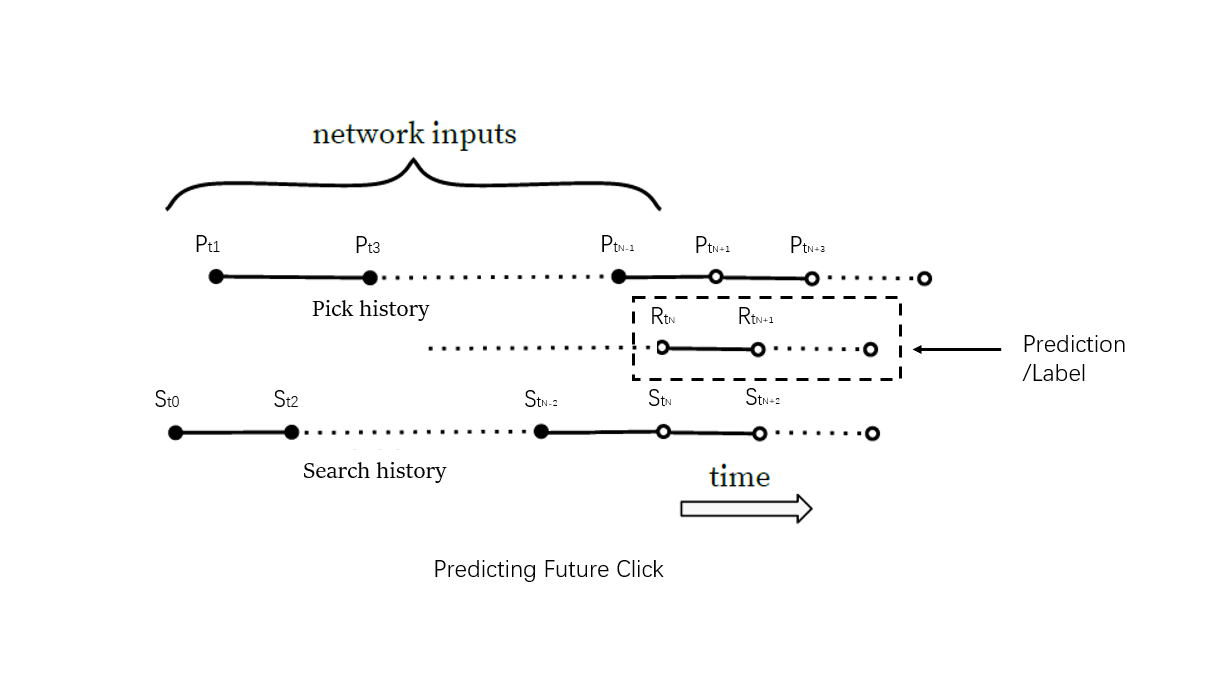